In [57]:
import pandas as pd
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')
import holoviews as hv
from scipy.stats import linregress
df = pd.read_csv("netflix2.csv")
print(df)

                        Name    Year Rating Duration  \
0              The Sea Beast  2022.0     7+   1h 59m   
1     Sonic the HedAllehoAll  2020.0     7+   1h 41m   
2              Tom and Jerry  2021.0     7+   1h 41m   
3           We Can Be Heroes  2020.0     7+   1h 40m   
4     STAND BY ME Doraemon 2  2020.0     7+   1h 37m   
...                      ...     ...    ...      ...   
8855                 Zinzana  2015.0    10+   90 min   
8856                  Zodiac  2007.0    18+  131 min   
8857              Zombieland  2009.0    18+  114 min   
8858                    Zoom  2006.0    15+  107 min   
8859                  Zubaan  2015.0    14+   97 min   

                                          CateAllory  
0                               Kids & Family Movies  
1                               Kids & Family Movies  
2                               Kids & Family Movies  
3                               Kids & Family Movies  
4                               Kids & Family Movies

In [58]:
df["Rating"]=df["Rating"].str.replace("+","")
df

,Name,Year,Rating,Duration,CateAllory
0,The Sea Beast,2022.0,7,1h 59m,Kids & Family Movies
1,Sonic the HedAllehoAll,2020.0,7,1h 41m,Kids & Family Movies
2,Tom and Jerry,2021.0,7,1h 41m,Kids & Family Movies
3,We Can Be Heroes,2020.0,7,1h 40m,Kids & Family Movies
4,STAND BY ME Doraemon 2,2020.0,7,1h 37m,Kids & Family Movies
...,...,...,...,...,...
8855,Zinzana,2015.0,10,90 min,"Dramas, International Movies, Thrillers"
8856,Zodiac,2007.0,18,131 min,"Cult Movies, Dramas, Thrillers"
8857,Zombieland,2009.0,18,114 min,"Comedies, Horror Movies"
8858,Zoom,2006.0,15,107 min,"Children & Family Movies, Comedies"


In [59]:
# I think it needs to be split first, then iterated over, if h in is min column then move over?

# Daniel talk
# if h, get the first character and convert to int x 60, add to hour column
    # remove hour column?
# if m, get the last two characters (Need exception if it doesn't exist - i.e. "4m" - stops if doesn't exist), if space - remove space, add to minute column
# if min, remove " min" and move to min

# Intialize columns
df['Hour'] = ""
df['Min'] = ""

# list to distringuish which durations are in hour, min - and which are only in min
duration_condition_hspace = pd.DataFrame(df['Duration'].str.contains('h '))
duration_condition_h = pd.DataFrame(df['Duration'].str.contains('h'))
duration_condition_m = pd.DataFrame(df['Duration'].str.contains('m'))
duration_condition_min = pd.DataFrame(df['Duration'].str.contains('min'))

# 
for i in range(len(df)):
    if (duration_condition_h.loc[i,'Duration'] == True):
        # copies just the first character, the number of hours
        df.loc[i,'Hour'] = df.loc[i,'Duration'][0]
    else:
        df.loc[i,'Hour'] = '0'
    
        
    if (duration_condition_m.loc[i,'Duration'] == True):
        
        if (duration_condition_min.loc[i,'Duration'] == True):
            # copies the case of 'x min' with characters, need to remove later 
            df.loc[i,'Min'] = df.loc[i,'Duration']
        else: 
            try:
                # Copies the last 2 characters, negative indexed past the 'm'
                df.loc[i,'Min'] = df.loc[i,'Duration'][-3] + df.loc[i,'Duration'][-2]
            except IndexError:
                # If there's nothing else to grab, ex. '4m' there's nothing more to index, just '4'
                df.loc[i,'Min'] = df.loc[i,'Duration'][-2]
    else:
        df.loc[i,'Min'] = '0'
                
# deleting ' min' from the "Min" column with replace function
df["Min"] = df["Min"].str.replace(" min","")
# deleting spaces in the "Min" column
df["Min"] = df['Min'].str.replace(" ","")

# convert "Hour" and "Min" columns to integers 

df

,Name,Year,Rating,Duration,CateAllory,Hour,Min
0,The Sea Beast,2022.0,7,1h 59m,Kids & Family Movies,1,59
1,Sonic the HedAllehoAll,2020.0,7,1h 41m,Kids & Family Movies,1,41
2,Tom and Jerry,2021.0,7,1h 41m,Kids & Family Movies,1,41
3,We Can Be Heroes,2020.0,7,1h 40m,Kids & Family Movies,1,40
4,STAND BY ME Doraemon 2,2020.0,7,1h 37m,Kids & Family Movies,1,37
...,...,...,...,...,...,...,...
8855,Zinzana,2015.0,10,90 min,"Dramas, International Movies, Thrillers",0,90
8856,Zodiac,2007.0,18,131 min,"Cult Movies, Dramas, Thrillers",0,131
8857,Zombieland,2009.0,18,114 min,"Comedies, Horror Movies",0,114
8858,Zoom,2006.0,15,107 min,"Children & Family Movies, Comedies",0,107


In [60]:
# df.loc[df['Min'].isna(),:]
df['Min'].unique()

array(['59', '41', '40', '37', '36', '26', '35', '34', '20', '38', '42',
       '33', '29', '39', '3', '32', '4', '30', '31', '49', '24', '44',
       '43', '7', '22', '46', '0', '50', '27', '45', '58', '25', '9',
       '13', '55', '47', '15', '8', '28', '5', '51', '57', '6', '2', '53',
       '12', '23', '11', '10', '1', '18', '21', '48', '52', '14', '56',
       '17', '19', '16', '54', '90', '91', '125', '104', '127', '67',
       '94', '161', '61', '166', '147', '103', '97', '106', '111', '110',
       '105', '96', '124', '116', '98', '115', '122', '99', '88', '100',
       '102', '93', '95', '85', '83', '113', '182', '145', '87', '92',
       '80', '117', '128', '119', '143', '114', '118', '108', '63', '121',
       '142', '154', '120', '82', '109', '101', '86', '229', '76', '89',
       '156', '112', '107', '129', '135', '136', '165', '150', '133',
       '70', '84', '140', '78', '64', '139', '69', '148', '189', '141',
       '130', '138', '81', '132', '123', '65', '68', '66', '6

In [61]:
# # Old version, kept just in case
# df["Duration"]=df["Duration"].str.replace("h","")
# df["Duration"]=df["Duration"].str.replace("m","")
# df["Duration"]=df["Duration"].str.replace("min","")
# df["Duration"]=df["Duration"].str.replace(" in","")
# df
# # list to distringuish which durations are in hour, min - and which are only in min
# duration_condition = pd.DataFrame(df['Duration'].str.contains(' '))
# # loops through df, splits Duration column if in hour, min - otherwise just put duration in minutes
# for i in range(len(df)):
#     if (duration_condition.loc[i,'Duration'] == True):
#         # df.loc[i,['Hour', 'Min']] = df.loc[i,'Duration'].str.split(' ', expand=True)
#         df.loc[i,['Hour', 'Min']] = df.loc[i,'Duration'].split()
#     else:
#         df.loc[i,'Min'] = df.loc[i,'Duration']
#         df.loc[i,'Hour'] = str(0)
# df

In [62]:
df= df.drop(df[df['Duration']=='1 Season'].index)
df= df.drop(df[df['Duration']==''].index)
df

,Name,Year,Rating,Duration,CateAllory,Hour,Min
0,The Sea Beast,2022.0,7,1h 59m,Kids & Family Movies,1,59
1,Sonic the HedAllehoAll,2020.0,7,1h 41m,Kids & Family Movies,1,41
2,Tom and Jerry,2021.0,7,1h 41m,Kids & Family Movies,1,41
3,We Can Be Heroes,2020.0,7,1h 40m,Kids & Family Movies,1,40
4,STAND BY ME Doraemon 2,2020.0,7,1h 37m,Kids & Family Movies,1,37
...,...,...,...,...,...,...,...
8855,Zinzana,2015.0,10,90 min,"Dramas, International Movies, Thrillers",0,90
8856,Zodiac,2007.0,18,131 min,"Cult Movies, Dramas, Thrillers",0,131
8857,Zombieland,2009.0,18,114 min,"Comedies, Horror Movies",0,114
8858,Zoom,2006.0,15,107 min,"Children & Family Movies, Comedies",0,107


In [63]:
df.dropna(inplace=True)
# #axis='index'
df

,Name,Year,Rating,Duration,CateAllory,Hour,Min
0,The Sea Beast,2022.0,7,1h 59m,Kids & Family Movies,1,59
1,Sonic the HedAllehoAll,2020.0,7,1h 41m,Kids & Family Movies,1,41
2,Tom and Jerry,2021.0,7,1h 41m,Kids & Family Movies,1,41
3,We Can Be Heroes,2020.0,7,1h 40m,Kids & Family Movies,1,40
4,STAND BY ME Doraemon 2,2020.0,7,1h 37m,Kids & Family Movies,1,37
...,...,...,...,...,...,...,...
8855,Zinzana,2015.0,10,90 min,"Dramas, International Movies, Thrillers",0,90
8856,Zodiac,2007.0,18,131 min,"Cult Movies, Dramas, Thrillers",0,131
8857,Zombieland,2009.0,18,114 min,"Comedies, Horror Movies",0,114
8858,Zoom,2006.0,15,107 min,"Children & Family Movies, Comedies",0,107


In [64]:
df = df[~df['Rating'].isin(["77", "74 min","84 min", "66 min"])]
df["Rating"].unique()
# NC-17 same as R rating, 

array(['7', 'All', '16', '13', '18', '12', '14', '10', 'TV-All', 'NC-17',
       'NR', '15'], dtype=object)

In [65]:
df['Year'] = pd.to_numeric(df['Year'])
# df['Year'].astype(int)
df['Year'] = df['Year'].round().astype('Int64')

df['Year']

0       2022
1       2020
2       2021
3       2020
4       2020
        ... 
8855    2015
8856    2007
8857    2009
8858    2006
8859    2015
Name: Year, Length: 8709, dtype: Int64

In [66]:
df['Hour'] = pd.to_numeric(df['Hour'])
df.dtypes

Name          object
Year           Int64
Rating        object
Duration      object
CateAllory    object
Hour           int64
Min           object
dtype: object

In [67]:
df['Min'] = pd.to_numeric(df['Min'])
# df['Min'] = df['Min'].round().astype('Int64')
# df['Min'] = df['Min'].apply(pd.to_numeric, errors='coerce')
df.dtypes

Name          object
Year           Int64
Rating        object
Duration      object
CateAllory    object
Hour           int64
Min            int64
dtype: object

In [68]:
# df.loc[df['Min'].isna(),:]

In [69]:
# Consolidating hours and minutes into a single 'Total Duration' in minutes
df['Total Duration'] = df['Hour']*60 + df['Min']
# df['Total Duration'] = pd.to_numeric(df['Total Duration'])
# df = df['Total Duration'].astype('int')
df

,Name,Year,Rating,Duration,CateAllory,Hour,Min,Total Duration
0,The Sea Beast,2022,7,1h 59m,Kids & Family Movies,1,59,119
1,Sonic the HedAllehoAll,2020,7,1h 41m,Kids & Family Movies,1,41,101
2,Tom and Jerry,2021,7,1h 41m,Kids & Family Movies,1,41,101
3,We Can Be Heroes,2020,7,1h 40m,Kids & Family Movies,1,40,100
4,STAND BY ME Doraemon 2,2020,7,1h 37m,Kids & Family Movies,1,37,97
...,...,...,...,...,...,...,...,...
8855,Zinzana,2015,10,90 min,"Dramas, International Movies, Thrillers",0,90,90
8856,Zodiac,2007,18,131 min,"Cult Movies, Dramas, Thrillers",0,131,131
8857,Zombieland,2009,18,114 min,"Comedies, Horror Movies",0,114,114
8858,Zoom,2006,15,107 min,"Children & Family Movies, Comedies",0,107,107


In [70]:
df_final = df.drop_duplicates(subset='Name', keep=False)
df_final

,Name,Year,Rating,Duration,CateAllory,Hour,Min,Total Duration
40,Inside the Mind of a Cat,2022,7,1h 7m,Kids & Family Movies,1,7,67
45,Larva Pendant,2022,7,33m,Kids & Family Movies,0,33,33
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,1h 30m,Kids & Family Movies,1,30,90
48,Chip and Potato: Chip’s Holiday,2022,All,24m,Kids & Family Movies,0,24,24
50,Rescued by Ruby,2022,7,1h 33m,Kids & Family Movies,1,33,93
...,...,...,...,...,...,...,...,...
8854,Zenda,2009,10,93 min,"Dramas, International Movies",0,93,93
8855,Zinzana,2015,10,90 min,"Dramas, International Movies, Thrillers",0,90,90
8857,Zombieland,2009,18,114 min,"Comedies, Horror Movies",0,114,114
8858,Zoom,2006,15,107 min,"Children & Family Movies, Comedies",0,107,107


In [71]:
df_cleaned = df_final[['Name','Year','Rating','CateAllory','Total Duration']]
df_cleaned.rename(columns = {'CateAllory':'Category','Total Duration':'Duration (Min)'},inplace=True)
df_cleaned

,Name,Year,Rating,Category,Duration (Min)
40,Inside the Mind of a Cat,2022,7,Kids & Family Movies,67
45,Larva Pendant,2022,7,Kids & Family Movies,33
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Kids & Family Movies,90
48,Chip and Potato: Chip’s Holiday,2022,All,Kids & Family Movies,24
50,Rescued by Ruby,2022,7,Kids & Family Movies,93
...,...,...,...,...,...
8854,Zenda,2009,10,"Dramas, International Movies",93
8855,Zinzana,2015,10,"Dramas, International Movies, Thrillers",90
8857,Zombieland,2009,18,"Comedies, Horror Movies",114
8858,Zoom,2006,15,"Children & Family Movies, Comedies",107


In [72]:
df_cleaned['Category'].nunique()

291

In [73]:
genre_split = df_cleaned['Category'].str.split(',', expand=True)
genre_split

,0,1,2
40,Kids & Family Movies,None,None
45,Kids & Family Movies,None,None
47,Kids & Family Movies,None,None
48,Kids & Family Movies,None,None
50,Kids & Family Movies,None,None
...,...,...,...
8854,Dramas,International Movies,None
8855,Dramas,International Movies,Thrillers
8857,Comedies,Horror Movies,None
8858,Children & Family Movies,Comedies,None


In [74]:
# This still doesn't account for categories that have multiple genres
for column in range(3):
    genre_split.loc[genre_split[column].str.contains('Kids',regex=False,na=False), column] = 'Family'

    genre_split.loc[genre_split[column].str.contains('Teen',regex=False,na=False), column] = 'Family'

    genre_split.loc[genre_split[column].str.contains('Family',regex=False,na=False), column] = 'Family'

    genre_split.loc[genre_split[column].str.contains('Horror',regex=False,na=False), column] = 'Thriller/Horror'

    genre_split.loc[genre_split[column].str.contains('Thriller',regex=False,na=False), column] = 'Thriller/Horror'

    genre_split.loc[genre_split[column].str.contains('Roman',regex=False,na=False), column] = 'Romance'

    genre_split.loc[genre_split[column].str.contains('Fantasy',regex=False,na=False), column] = 'Fantasy'

    genre_split.loc[genre_split[column].str.contains('Crime',regex=False,na=False), column] = 'Crime'

    genre_split.loc[genre_split[column].str.contains('Action',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Adventure',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Martial',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Sport',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Docu',regex=False,na=False), column] = 'Documentary'

    genre_split.loc[genre_split[column].str.contains('Science',regex=False,na=False), column] = 'Documentary'

    genre_split.loc[genre_split[column].str.contains('Music',regex=False,na=False), column] = 'Music'

    genre_split.loc[genre_split[column].str.contains('Sci-Fi',regex=False,na=False), column] = 'Science-Fiction'

    genre_split.loc[genre_split[column].str.contains('Spy',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Concert',regex=False,na=False), column] = 'Music'

    genre_split.loc[genre_split[column].str.contains('Anime',regex=False,na=False), column] = 'Anime'

    genre_split.loc[genre_split[column].str.contains('US',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Middle',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Chinese',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Hindi',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Tamil',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('African',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('International Movie',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Hip',regex=False,na=False), column] = 'Music'

    genre_split.loc[genre_split[column].str.contains('Food',regex=False,na=False), column] = 'Family'

    genre_split.loc[genre_split[column].str.contains('Movies ',regex=False,na=False), column] = 'Others'

    genre_split.loc[genre_split[column].str.contains('Military',regex=False,na=False), column] = 'Others'

    genre_split.loc[genre_split[column].str.contains('Period',regex=False,na=False), column] = 'Others'

    genre_split.loc[genre_split[column].str.contains('TeluAllu',regex=False,na=False), column] = 'Others'

    genre_split.loc[genre_split[column].str.contains('Independent',regex=False,na=False), column] = 'Others'
    
    genre_split.loc[genre_split[column].str.contains('Cult',regex=False,na=False), column] = 'Others'
    
    genre_split.loc[genre_split[column].str.contains('LAllBTQ',regex=False,na=False), column] = 'Others'
    
    genre_split.loc[genre_split[column].str.contains('Classic',regex=False,na=False), column] = 'Classics'
    
    genre_split.loc[genre_split[column].str.contains('Movies',regex=False,na=False), column] = 'Others'
    
    genre_split.loc[genre_split[column].str.contains('Drama',regex=False,na=False), column] = 'Drama'
    
    genre_split.loc[genre_split[column].str.contains('Come',regex=False,na=False), column] = 'Comedy'

# If movie -> check if a secondary category 
    

print(genre_split[0].value_counts())
print(genre_split[1].value_counts())  
print(genre_split[2].value_counts())

Comedy              1387
Drama               1365
Documentary          763
Action/Adventure     677
Family               466
Thriller/Horror      354
International        117
Others               102
Classics              73
Anime                 28
Music                 23
Romance               17
Fantasy               11
Crime                  8
Science-Fiction        1
Name: 0, dtype: int64
International            1402
Others                    584
Drama                     572
Comedy                    302
Thriller/Horror           228
Romance                   136
Music                     130
Fantasy                    95
Action/Adventure           77
 Faith & Spirituality      49
Documentary                34
Anime                      32
Classics                   26
Family                     19
Name: 1, dtype: int64
International            688
Romance                  365
Others                   193
Thriller/Horror          191
Music                    175
Fantasy         

In [75]:
len(df_cleaned['Category'])

5392

In [76]:
genre_split[0]

40      Family
45      Family
47      Family
48      Family
50      Family
         ...  
8854     Drama
8855     Drama
8857    Comedy
8858    Family
8859     Drama
Name: 0, Length: 5392, dtype: object

In [77]:
df_cleaned['Category'] = genre_split[0]
df_cleaned

,Name,Year,Rating,Category,Duration (Min)
40,Inside the Mind of a Cat,2022,7,Family,67
45,Larva Pendant,2022,7,Family,33
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Family,90
48,Chip and Potato: Chip’s Holiday,2022,All,Family,24
50,Rescued by Ruby,2022,7,Family,93
...,...,...,...,...,...
8854,Zenda,2009,10,Drama,93
8855,Zinzana,2015,10,Drama,90
8857,Zombieland,2009,18,Comedy,114
8858,Zoom,2006,15,Family,107


In [78]:
# Create a new column of age rating sorted into PG, PG-13, TV-14A, R
df_cleaned['Modern Rating'] = ""
df_cleaned

,Name,Year,Rating,Category,Duration (Min),Modern Rating
40,Inside the Mind of a Cat,2022,7,Family,67,
45,Larva Pendant,2022,7,Family,33,
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Family,90,
48,Chip and Potato: Chip’s Holiday,2022,All,Family,24,
50,Rescued by Ruby,2022,7,Family,93,
...,...,...,...,...,...,...
8854,Zenda,2009,10,Drama,93,
8855,Zinzana,2015,10,Drama,90,
8857,Zombieland,2009,18,Comedy,114,
8858,Zoom,2006,15,Family,107,


In [79]:
# Sorting ratings by Canadian metrics
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '7'].index,'Modern Rating'] = 'PG'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == 'All'].index,'Modern Rating'] = 'G'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '18'].index,'Modern Rating'] = 'Adult'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '13'].index,'Modern Rating'] = 'PG-13'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '16'].index,'Modern Rating'] = '14A'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '14'].index,'Modern Rating'] = '14A'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '10'].index,'Modern Rating'] = 'PG'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == 'TV-All'].index,'Modern Rating'] = 'G'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == 'NC-17'].index,'Modern Rating'] = 'Adult'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == 'NR'].index,'Modern Rating'] = 'NR'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '15'].index,'Modern Rating'] = '14A'
# genre_split.loc[genre_split[column].str.contains('Come',regex=False,na=False), column] = 'Comedy'
# df_cleaned.loc[df_cleaned['Rating'] == '7',:]
df_cleaned['Modern Rating'].value_counts()

Adult    2589
14A      1461
PG        643
PG-13     353
G         344
NR          2
Name: Modern Rating, dtype: int64

In [80]:
df_cleaned['Modern Rating'].isna().any()

False

In [81]:
df_cleaned.to_csv("netflix_clean.csv",encoding='utf-8')

In [82]:
# For answering a genre question, only include the categories of a single genre 

In [83]:
# Split categories by string " , " and just count? - if a movie has three categories it contributes 0.33?

In [84]:
#Generate Data Visualizations/Statistics to Answer Question(s) 1: What is the average length of a movie today? and have movie lengths changed since the 1940s? 

#Calculate the summary statistics 
#Mean 
Mean_MovieDuration=df_cleaned["Duration (Min)"].mean()
Mean_MovieDuration

99.0522997032641

In [85]:
#SD 
sd_MovieDuration=df_cleaned["Duration (Min)"].std()
sd_MovieDuration

29.48913715369301

In [86]:
#Median
median_MovieDuration = df_cleaned["Duration (Min)"].median()
median_MovieDuration

99.0

In [87]:
#IQR
Q1 = df_cleaned["Duration (Min)"].quantile(0.25)
Q3 = df_cleaned["Duration (Min)"].quantile(0.75)
IQR = Q3-Q1
IQR

28.0

In [88]:
#Number of movies 
movie_count=len(df_cleaned["Name"].unique())
movie_count

5392

In [162]:
#Max Duration of movies 
max_MovieDuration = df_cleaned["Duration (Min)"].max()
max_MovieDuration

312

In [163]:
min_MovieDuration = df_cleaned["Duration (Min)"].min()
min_MovieDuration

3

In [89]:
df = pd.DataFrame({'Number of Movies': [5392], "Mean Duration (Min)": [98.9], "Std Duration (Min)": [29.3], "Median Duration (Min)": [99], "IQR Duration (Min)": [28]})
df

,Number of Movies,Mean Duration (Min),Std Duration (Min),Median Duration (Min),IQR Duration (Min)
0,5392,98.9,29.3,99,28


In [90]:
# Binning by decade
bins = [1942,1952,1962,1972,1982,1992,2002,2012,2022]
group_labels = ["1942 - 1952","1952 - 1962","1962 - 1972","1972 - 1982","1982 - 1992","1992 - 2002","2002 - 2012","2012 - 2022"]
df_year_binned = df_cleaned.copy()
df_year_binned["Decade"] = pd.cut(df_year_binned["Year"], bins, labels = group_labels)
df_year_groupby = df_year_binned.groupby("Decade")
df_year_groupby["Name"].count()

Decade
1942 - 1952      11
1952 - 1962      16
1962 - 1972      25
1972 - 1982      86
1982 - 1992     132
1992 - 2002     287
2002 - 2012     914
2012 - 2022    3919
Name: Name, dtype: int64

In [91]:
# Average duration per decade 
df_year_groupby["Duration (Min)"].mean()

Decade
1942 - 1952     89.636364
1952 - 1962    108.500000
1962 - 1972    103.520000
1972 - 1982    111.813953
1982 - 1992    104.439394
1992 - 2002    105.198606
2002 - 2012    104.746171
2012 - 2022     96.771115
Name: Duration (Min), dtype: float64

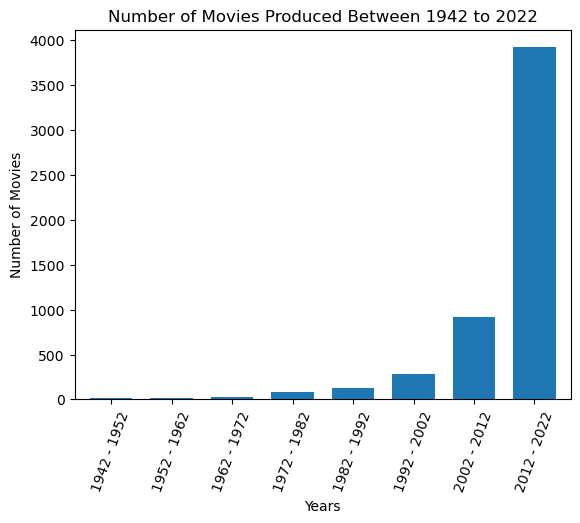

In [92]:
#Create Barplot for movies produced between 1942 to 2022 to demonstrate the distribution of movies in our dataset. 
bar_plot = df_year_binned["Decade"].value_counts().plot.bar(width=0.7, rot=70)

#Set Labels 
bar_plot.set_xlabel("Years")
bar_plot.set_ylabel("Number of Movies")
bar_plot.set_title ("Number of Movies Produced Between 1942 to 2022")


#Reformat x-axis to be palatable for viewers 
plt.gca().invert_xaxis()


In [101]:
# Create Barplot for movies produced between 1942 to 2022 to demonstrate the distribution of movies in our dataset. 
mylist =df_year_binned["Decade"].unique()

x=["2012 - 2022","2002 - 2012","1992 - 2002","1982 - 1992","1972 - 1982","1962 - 1972","1952 - 1962","1942 - 1952"]


# mylist = [str(x) for x in mylist]
# # print(mylist)
# newlist = [x for x in mylist if x != 'nan']
# # print(newlist)
# x=newlist

y=[]

for i in range(0,len(df_year_binned["Decade"])):
    if i<8:
        y. append(df_year_binned["Decade"].value_counts()[i])

Bin_df=pd.DataFrame({"Decades":x, "Number of Movies":y})

Bin_df



,Decades,Number of Movies
0,2012 - 2022,3919
1,2002 - 2012,914
2,1992 - 2002,287
3,1982 - 1992,132
4,1972 - 1982,86
5,1962 - 1972,25
6,1952 - 1962,16
7,1942 - 1952,11


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

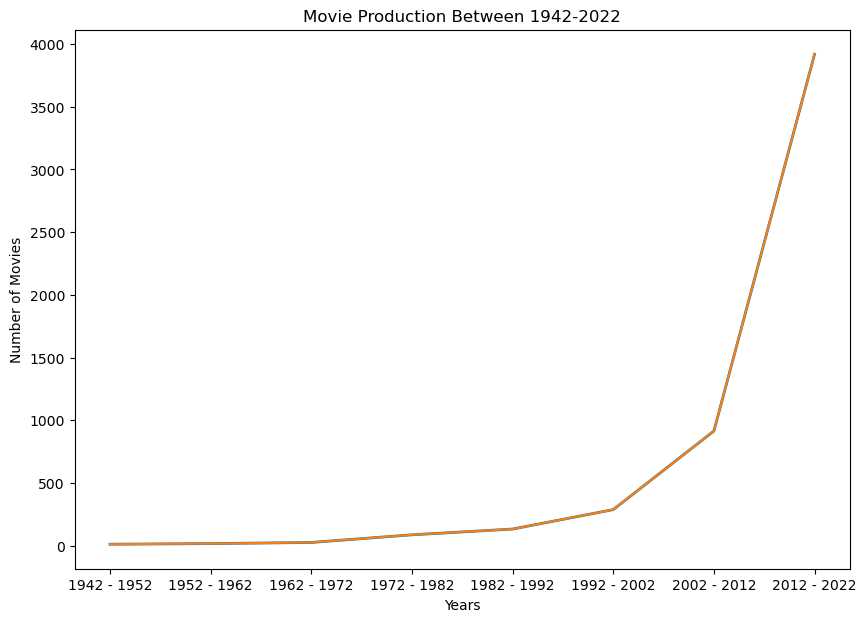

In [102]:
# plot
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(x, y, linewidth=2.0)

line, = ax.plot(x, y)


plt.ylabel('Number of Movies')
plt.xlabel('Years')
plt.title('Movie Production Between 1942-2022')
# plt.grid()
# plt.legend()       
plt.gca().invert_xaxis()

def animate(i):
    line.set_ydata(y)  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.

ani.save("movie.mp4")

In [106]:
#Binning by decade
bins = [0,60,90,120,150,180,210,240,270,300,330]
group_labels = ["0-59","60-89","90-119","120-149","150-179","180-219","220-239","240-269","270-299","300-330"]
df_duration_binned = df_cleaned.copy()
df_duration_binned["Duration"] = pd.cut(df_duration_binned["Duration (Min)"], bins, labels = group_labels)
df_duration_groupby = df_duration_binned.groupby("Duration")
df_duration_groupby["Duration (Min)"].mean()


Duration
0-59        40.126050
60-89       79.432258
90-119     103.570266
120-149    131.777633
150-179    161.883117
180-219    192.117647
220-239    227.700000
240-269    253.000000
270-299    273.000000
300-330    312.000000
Name: Duration (Min), dtype: float64

Text(0.5, 1.0, 'Movie Duration')

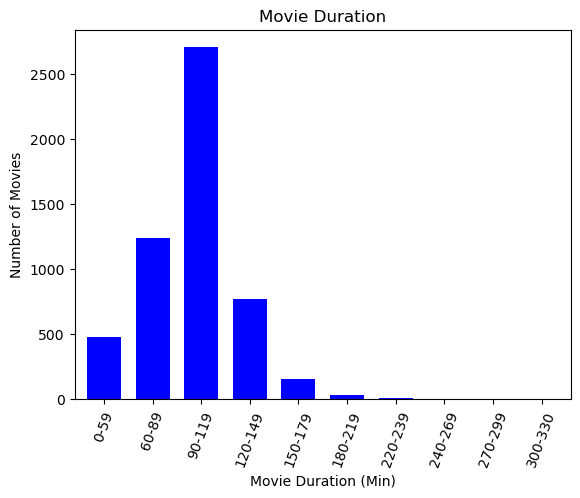

In [154]:
#Create a bar chart to demonstrarte whether movie duration (min) have changed between 1942 and 2022. 

bar_plot = df_duration_binned["Duration"].value_counts(sort=False).plot.bar(width=0.7, color='b', rot=70)

#Set Labels 
bar_plot.set_xlabel("Movie Duration (Min)")
bar_plot.set_ylabel("Number of Movies")
bar_plot.set_title ("Movie Duration")



(-1.1097399832139174,
 1.1111235882974793,
 -1.1092577641827746,
 1.1019305976666742)

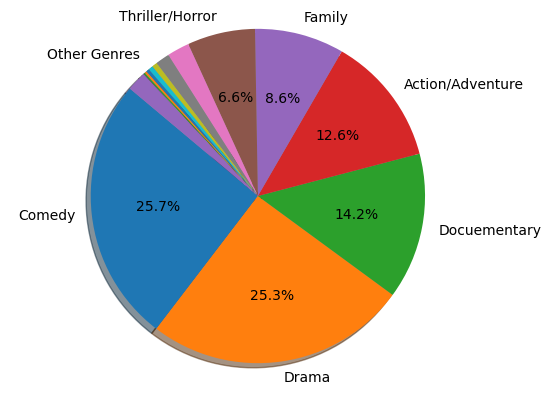

In [160]:
#Question 2 - Movie Genres 

#What is the distribution of Movie genres in our dataset? 

#Create Pie Chart to visualize the data 

#Labels for the sections of the pie chart 
labels = ["Comedy", "Drama", "Docuementary", "Action/Adventure", "Family", "Thriller/Horror", "", "", "", "Other Genres", "", "", "", "", ""]

#The values of each section for the pie chart 
sizes = [1387, 1365, 763, 677, 466, 354, 117, 73, 28, 23, 17, 11, 8, 1, 102]

#Matplot to separate Comedy & Drama from the pie chart 
explode = (0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0)

#create pie chart and turn into percentages 
def my_autopct(pct):
    return('%1.1f%%' % pct) if pct > 6 else ''
plt.pie(sizes, explode=explode, labels=labels, autopct= my_autopct, shadow=True, startangle=140)
plt.axis("equal")

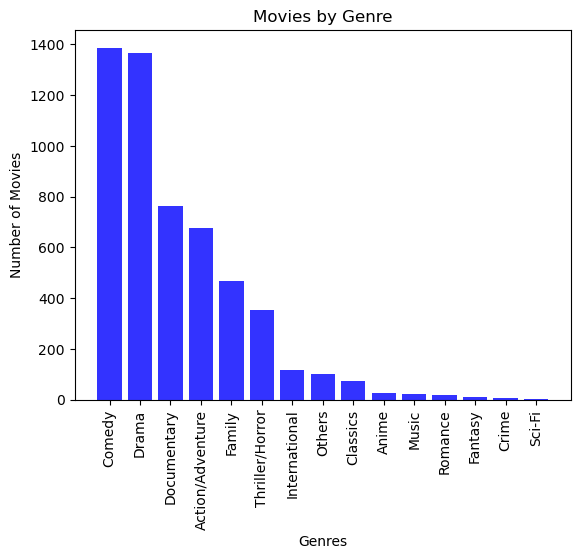

In [42]:
#Pie Chart not appropriate demonstration due to >10 categories therefore will produce a histogram to demonstrate the distribution of genres. 

fig, ax = plt.subplots()

#Create values for pie chart 
Genres = ["Comedy", "Drama", "Documentary", "Action/Adventure", "Family", "Thriller/Horror", "International", "Others", "Classics", "Anime", "Music", "Romance", "Fantasy", "Crime", "Sci-Fi"]
counts = [1387, 1365, 763, 677, 466, 354, 117, 102, 73, 28, 23, 17,11,8,1]
ax.bar(Genres, counts, color='b', alpha=0.8, align='center')

#Label axes and title
ax.set_ylabel("Number of Movies")
ax.set_title ("Movies by Genre")
plt.xticks(rotation="vertical")
plt.xlabel("Genres")

#Add percentage to bar graph 


#Show plot
plt.show()

In [43]:
#Create a dataframe for the summary statistics of movie genres by minutes

#summary statistics 
mean = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).mean()
median = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).median()
var = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).var()
std = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).std()
sem = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).sem()

summary_stat= pd.DataFrame(
                        [{"Average Movie Duration (min)": mean,
                           "Median Movie Duration (min)": median,
                          "Duration variance": var, 
                          "Duration standard deviation": std,
                          "Movie Duration: Standard error": sem}])
summary_stat.head()

,Average Movie Duration (min),Median Movie Duration (min),Duration variance,Duration standard deviation,Movie Duration: Standard error
0,Category Action/Adventure 106.454948 Anime ...,Category Action/Adventure 103.0 Anime ...,Category Action/Adventure 833.390349 Anime...,Category Action/Adventure 28.868501 Anime ...,Category Action/Adventure 1.109507 Anime ...


In [44]:
#create average duration (min) for each genre 

mean 

Category
Action/Adventure    106.454948
Anime                99.214286
Classics             98.178082
Comedy               96.692862
Crime               114.125000
Documentary          90.904325
Drama               105.972161
Family               88.615880
Fantasy              97.272727
International       104.170940
Music                98.695652
Others               89.705882
Romance             108.235294
Science-Fiction     109.000000
Thriller/Horror      99.194915
Name: Duration (Min), dtype: float64

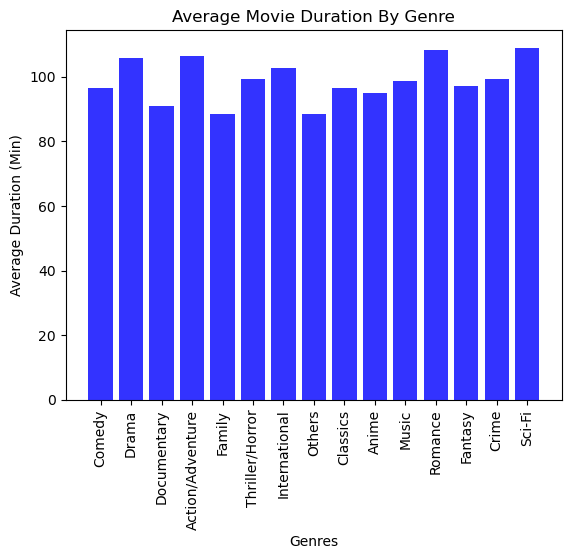

In [45]:
fig, ax = plt.subplots()

#Create values for bar chart 
Genres = ["Comedy", "Drama", "Documentary", "Action/Adventure", "Family", "Thriller/Horror", "International", "Others", "Classics", "Anime", "Music", "Romance", "Fantasy", "Crime", "Sci-Fi"]
Minutes = [96.61, 105.97,90.90, 106.45, 88.50, 99.19, 102.66, 88.54, 96.61, 95.00, 98.70, 108.23, 97.27, 99.38, 109.00]
ax.bar(Genres, Minutes, color='b', alpha=0.8, align='center')

#Label axes and title
ax.set_ylabel("Average Duration (Min)")
ax.set_title ("Average Movie Duration By Genre")
plt.xticks(rotation="vertical")
plt.xlabel("Genres")

#Show plot
plt.show()

In [46]:
#Statistics - Which columns have the lowest average movie Duration? the longest? Is there a signficiant difference between movie run times between genres? 


In [47]:
#Scatterplot with multiple lines for different genres by year (x-axis) and minute duration (y-axis) to observe if movie genre lengths changed overtime.


<function matplotlib.pyplot.show(close=None, block=None)>

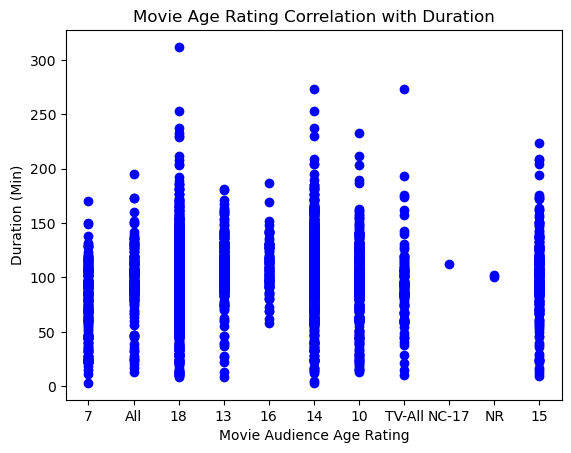

In [48]:
#Question 3 Do average movie times differ based on movie rating systems (PG, PG-13, TV-14A, R)? 

#Does the age rating correlate with the length of the movie? (scatterplot with linear cor. Ratings on x-axis and length by minutes on y) 

x_ax = df_cleaned["Rating"]
dur = df_cleaned ["Duration (Min)"]

fig1, ax1 = plt.subplots()
plt.title ("Movie Age Rating Correlation with Duration")
plt.scatter(x_ax, dur, marker = 'o', color="blue")
plt.xlabel("Movie Audience Age Rating")
plt.ylabel("Duration (Min)")


plt.show

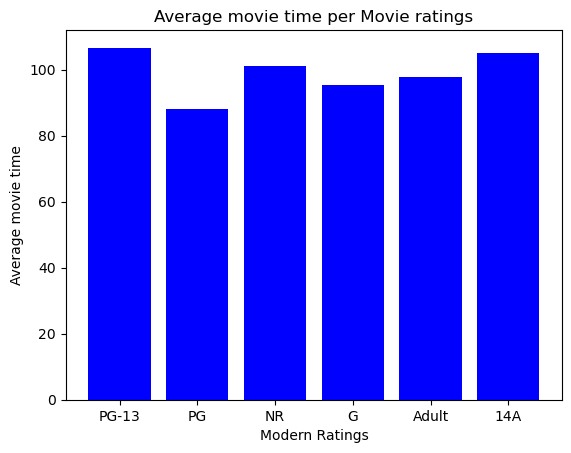

In [49]:
#Do average movie time differ based on Movie ratings (PG, PG-13, TV-14A, R)?

average = df_cleaned.groupby(["Modern Rating"])["Duration (Min)"].mean().map("{:.2f}".format)
    
y=[105.04,97.87,95.36,101.00,88.02,106.63]

# for i in range(len(average)):
#     y.append(average[i])
    
x = ['14A', 'Adult', 'G', 'NR', 'PG', 'PG-13']

# y
rating_df=pd.DataFrame({"Modern Rating":x, "Average":y})

plt.bar(x, y, color="b", align="center")
plt.title("Average movie time per Movie ratings")
plt.xlabel("Modern Ratings")
plt.ylabel("Average movie time")
# plt.figure(figsize=(12,6))
plt.savefig("average movie time.png")
plt.gca().invert_xaxis()

plt.show()

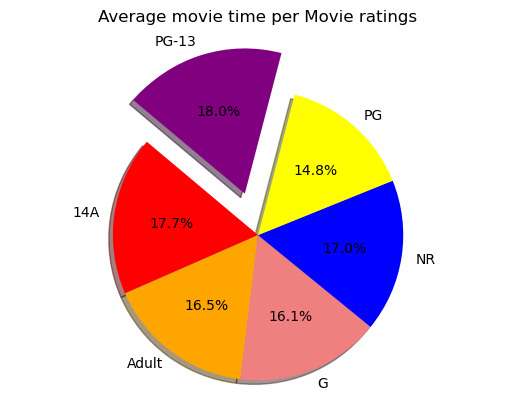

In [50]:
# Labels for the sections of our pie chart
labels =['14A', 'Adult', 'G', 'NR', 'PG', 'PG-13']

# The values of each section of the pie chart
sizes = y

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "blue","yellow","purple"]

# Tells matplotlib to separate the "PG-13" section from the others
explode = (0, 0, 0, 0,0,0.3)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Average movie time per Movie ratings")
plt.savefig("average movie time2.png")

In [51]:
#What are the age ratings by top the top 6 genres?

# average = df_cleaned.groupby(["Category"])["Rating"].mean()
# # average

df_cleaned

,Name,Year,Rating,Category,Duration (Min),Modern Rating
40,Inside the Mind of a Cat,2022,7,Family,67,PG
45,Larva Pendant,2022,7,Family,33,PG
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Family,90,PG
48,Chip and Potato: Chip’s Holiday,2022,All,Family,24,G
50,Rescued by Ruby,2022,7,Family,93,PG
...,...,...,...,...,...,...
8854,Zenda,2009,10,Drama,93,PG
8855,Zinzana,2015,10,Drama,90,PG
8857,Zombieland,2009,18,Comedy,114,Adult
8858,Zoom,2006,15,Family,107,14A


Text(0, 0.5, 'Duration (Min)')

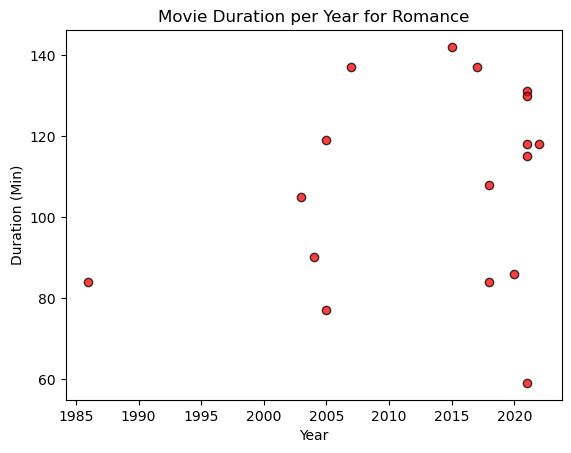

In [95]:
rom_df=df_cleaned.loc[(df_cleaned['Category']=="Romance")]
xs=rom_df["Year"]
ys=rom_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Romance")
plt.xlabel("Year")
plt.ylabel("Duration (Min)")


Text(0, 0.5, 'Duration (Min)')

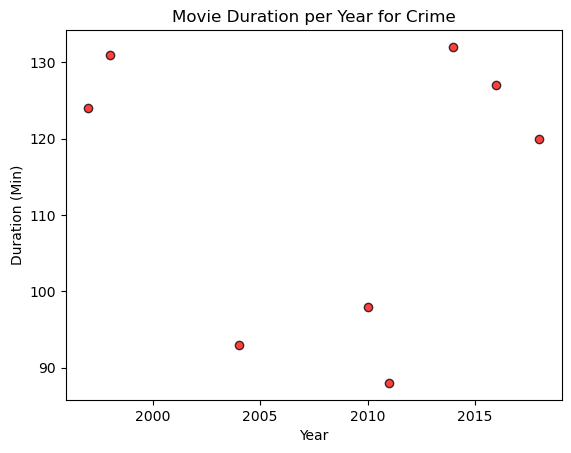

In [96]:
cri_df=df_cleaned.loc[(df_cleaned['Category']=="Crime")]
xs=cri_df["Year"]
ys=cri_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Crime")
plt.xlabel("Year")
plt.ylabel("Duration (Min)")

Text(0, 0.5, 'Duration (Min)')

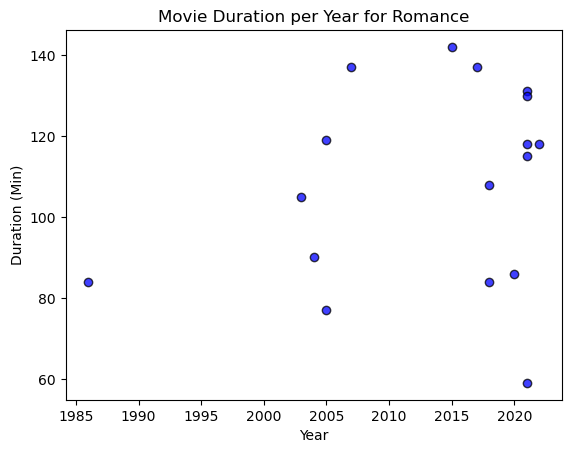

In [97]:
rom_df=df_cleaned.loc[(df_cleaned['Category']=="Romance")]
xs=rom_df["Year"]
ys=rom_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Romance")
plt.xlabel("Year")
plt.ylabel("Duration (Min)")

Text(0, 0.5, 'Duration (Min)')

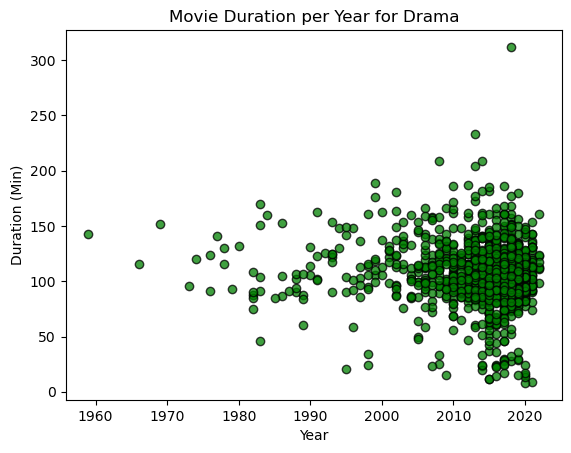

In [98]:
dram_df=df_cleaned.loc[(df_cleaned['Category']=="Drama")]
xs=dram_df["Year"]
ys=dram_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Drama")
plt.xlabel("Year")
plt.ylabel("Duration (Min)")

Text(0, 0.5, 'Duration (Min)')

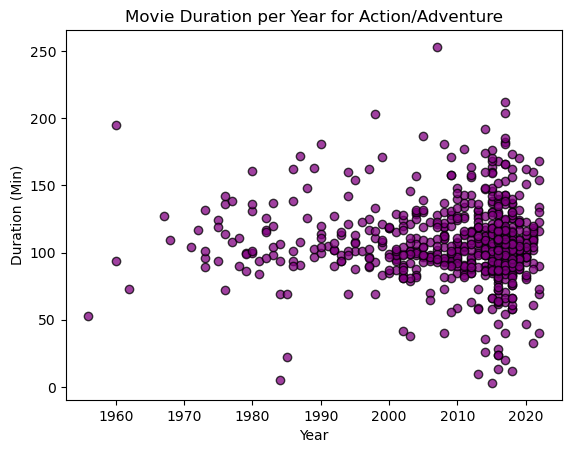

In [99]:
act_df=df_cleaned.loc[(df_cleaned['Category']=="Action/Adventure")]
xs=act_df["Year"]
ys=act_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Action/Adventure")
plt.xlabel("Year")
plt.ylabel("Duration (Min)")